### https://www.kaggle.com/c/tabular-playground-series-apr-2021

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [5]:
ds = pd.read_csv('train.csv', delimiter=',')

### Filling missing values

In [6]:
ds.head(3)

PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  Parch  \
0            0         1       1  Oconnor, Frankie  male   NaN      2      0   
1            1         0       3       Bryan, Drew  male   NaN      0      0   
2            2         0       3    Owens, Kenneth  male  0.33      1      2   

      Ticket   Fare   Cabin Embarked  
0     209245  27.14  C12239        S  
1      27323  13.35     NaN        S  
2  CA 457703  71.29     NaN        S

In [7]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
columns_cat = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
columns_numeric = ['Age', 'Fare']
target = ['Survived']

In [9]:
def filling_missing_values_mean(data, column):
    
    data[column][data.Survived == 0] = data[column].fillna(data[column][data.Survived == 0].mean())
    data[column][data.Survived == 1] = data[column].fillna(data[column][data.Survived == 1].mean())
    
    return data

In [10]:
ds = filling_missing_values_mean(ds, 'Age')

In [11]:
ds = filling_missing_values_mean(ds, 'Fare')

In [12]:
ds = ds[columns_cat + columns_numeric + target]
ds.dropna(axis=0, inplace=True)

In [13]:
ds.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare',
       'Survived'],
      dtype='object')

In [14]:
ds.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Age         0
Fare        0
Survived    0
dtype: int64

In [15]:
ds.shape

(99750, 8)

In [16]:
X = ds.drop('Survived', axis=1)
y = ds.Survived

In [17]:
X.shape, y.shape

((99750, 7), (99750,))

In [18]:
X.head(3)

Pclass   Sex  SibSp  Parch Embarked        Age   Fare
0       1  male      2      0        S  40.553799  27.14
1       3  male      0      0        S  36.708695  13.35
2       3  male      1      2        S   0.330000  71.29

In [19]:
X = pd.get_dummies(X, columns=columns_cat, drop_first=True, prefix_sep='_')

In [20]:
X.head(3)

Age   Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  SibSp_2  SibSp_3  \
0  40.553799  27.14         0         0         1        0        1        0   
1  36.708695  13.35         0         1         1        0        0        0   
2   0.330000  71.29         0         1         1        1        0        0   

   SibSp_4  SibSp_5  SibSp_8  Parch_1  Parch_2  Parch_3  Parch_4  Parch_5  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        1        0        0        0   

   Parch_6  Parch_9  Embarked_Q  Embarked_S  
0        0        0           0           1  
1        0        0           0           1  
2        0        0           0           1

### train test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

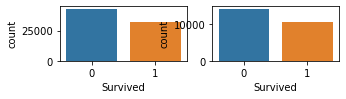

In [23]:
plt.figure(figsize=(5, 1))
plt.subplot(121)
sns.countplot(y_train);
plt.subplot(122)
sns.countplot(y_test);

In [24]:
X_train.head(3)

Age   Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  SibSp_2  SibSp_3  \
73757  29.0  95.60         0         0         1        0        1        0   
71167  28.0   6.18         0         1         1        0        0        0   
71078  27.0   6.47         0         1         1        0        0        0   

       SibSp_4  SibSp_5  SibSp_8  Parch_1  Parch_2  Parch_3  Parch_4  Parch_5  \
73757        0        0        0        0        0        0        0        0   
71167        0        0        0        0        0        0        0        0   
71078        0        0        0        0        0        0        0        0   

       Parch_6  Parch_9  Embarked_Q  Embarked_S  
73757        0        0           0           1  
71167        0        0           0           1  
71078        0        0           0           1

### models

In [25]:
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, Perceptron, LogisticRegression
from sklearn.linear_model import RidgeClassifierCV, SGDClassifier, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, NuSVC, SVC

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [193]:
scores

model  accuracy
0                     log_reg  0.765057
0                  PassiveAgg  0.576189
0                  Perceptron  0.738752
0                  RidgeClass  0.764376
0                    SGDClass  0.704788
0                  GaussianNB  0.740236
0      DecisionTreeClassifier  0.689951
0         ExtraTreeClassifier  0.693801
0          AdaBoostClassifier  0.759123
0           BaggingClassifier  0.770832
0        ExtraTreesClassifier  0.713129
0  GradientBoostingClassifier  0.775243
0      RandomForestClassifier  0.729409
0              LGBMClassifier  0.778250
0               XGBClassifier  0.777368

### LGBM

In [30]:
scores = []
params = []

for n in np.linspace(0.01, 0.2, 2):
    
    model = LGBMClassifier(n_estimators=100, learning_rate=0.14434343434, metric='accuracy', max_depth=9, random_state = 42)
    model.fit(X_train , y_train, eval_metric='accuracy')
    
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

0.01 - 0.7788916512952121|0.2 - 0.7788916512952121|

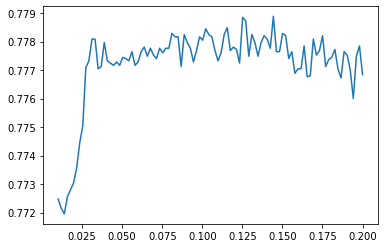

In [152]:
plt.plot(params, scores);

In [153]:
max(scores)

0.7788916512952121

In [154]:
np.argmax(scores)

70

In [155]:
params[70]

0.14434343434343436

In [26]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.14434343434, metric='accuracy', max_depth=9, random_state = 42)

In [27]:
model.fit(X_train , y_train, eval_set = [(X_train , y_train), (X_test, y_test)] , eval_metric='accuracy', verbose = False)

LGBMClassifier(learning_rate=0.14434343434, max_depth=9, metric='accuracy',
               random_state=42)

In [28]:
y_pred = model.predict_proba(X_test)

### threshold

In [29]:
acc = []
threshold = []

for i in np.linspace(0.1, 0.9, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

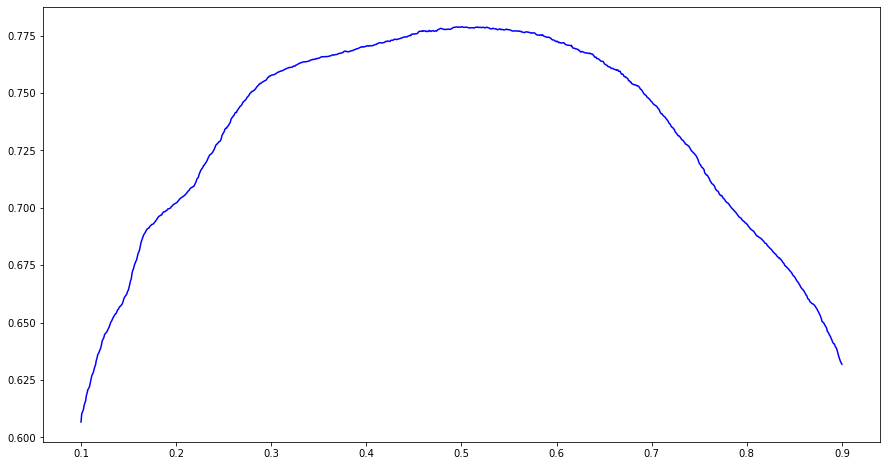

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.1, 0.9, 1000), acc, color='b')
plt.show()

In [31]:
max(acc), np.argmax(acc)

(0.7789317507418397, 500)

In [32]:
threshold[500]

0.5004004004004005

### RF

In [200]:
%%time
accur = [] 
x = []
x_keys = []
n = 0

for cr in ['gini', 'entropy']:
    for mln in [9, 7, 5, 3, None]:
        for mf in [1, 2, 3, 4, 5, 6, 'auto']:
            for boot in [True, False]:
                model = RandomForestClassifier(n_estimators=300, criterion=cr, max_leaf_nodes=mln, 
                                               max_features=mf, bootstrap=boot, random_state=33, n_jobs=-1)
                
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                                
                acc = accuracy_score(y_test, y_pred)
                accur.append(acc)
                                
                x_keys.append(str(cr) +'_'+ str(mln) +'_'+ str(mf) +'_'+ str(boot))
                x.append(n)
                n += 1

CPU times: user 45min 59s, sys: 32.3 s, total: 46min 31s
Wall time: 8min 6s


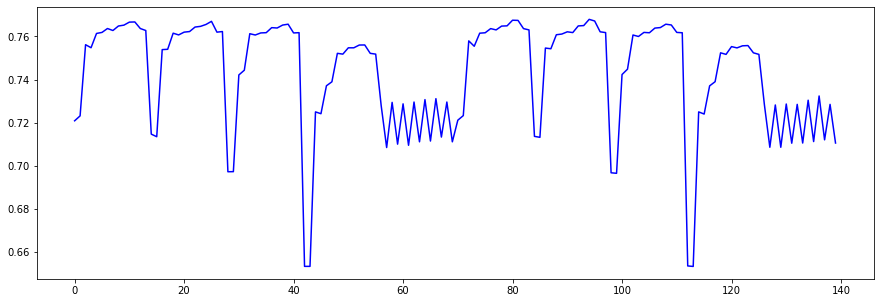

In [201]:
plt.figure(figsize=(15, 5))
plt.plot(x, accur, c='b')
plt.show()

In [202]:
data_score = {'accuracy': accur}
ds_scores = pd.DataFrame(data_score, index=x_keys)

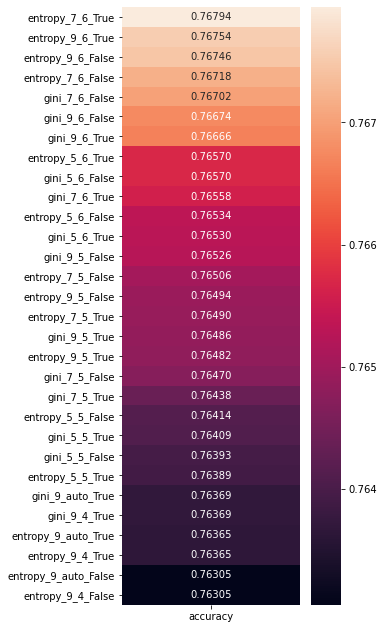

In [206]:
plt.figure(figsize=(4, 11))
sns.heatmap(ds_scores.sort_values(by=['accuracy'], ascending=False)[:30], annot=True, fmt='.5f');

In [53]:
model = RandomForestClassifier(n_estimators=4500, criterion='entropy', max_leaf_nodes=9,
                               max_features=6, bootstrap=True, random_state=33, n_jobs=-1)

In [54]:
%%time
model.fit(X_train, y_train)

CPU times: user 3min 4s, sys: 1.95 s, total: 3min 6s
Wall time: 31 s


RandomForestClassifier(criterion='entropy', max_features=6, max_leaf_nodes=9,
                       n_estimators=4500, n_jobs=-1, random_state=33)

In [55]:
y_pred = model.predict_proba(X_test)

In [56]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

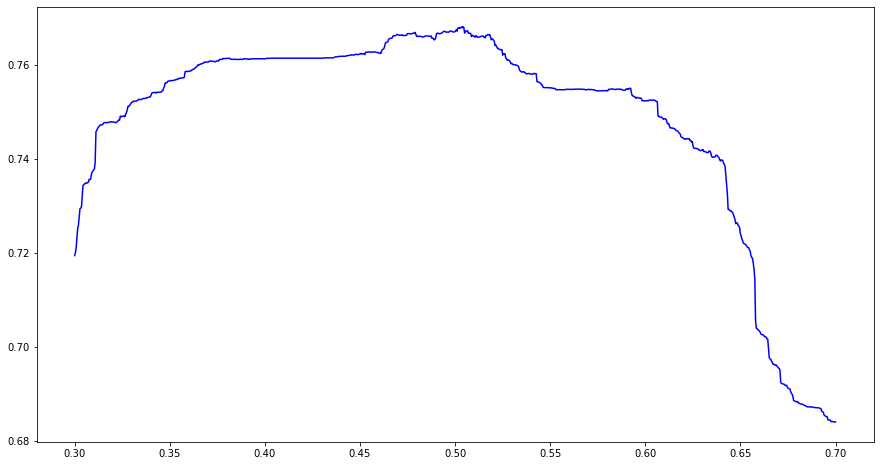

In [57]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b')
plt.show()

In [58]:
max(acc), np.argmax(acc)

(0.7680648007057502, 510)

In [59]:
threshold[510]

0.5042042042042042

### ADAboost

In [60]:
scores = []
params = []

for n in np.arange(1):
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=42), 
                               n_estimators=43,
                               learning_rate=0.2789473684210526, 
                               random_state = 42)
    model.fit(X_train , y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

0 - 0.7774881706632448|

In [65]:
%%time
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=42), 
                               n_estimators=43, learning_rate=0.2789473684210526, random_state = 42)

model.fit(X_train, y_train)

CPU times: user 4.51 s, sys: 1.46 ms, total: 4.51 s
Wall time: 4.51 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_leaf_nodes=9,
                                                         random_state=42),
                   learning_rate=0.2789473684210526, n_estimators=43,
                   random_state=42)

In [66]:
y_pred = model.predict_proba(X_test)

In [67]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

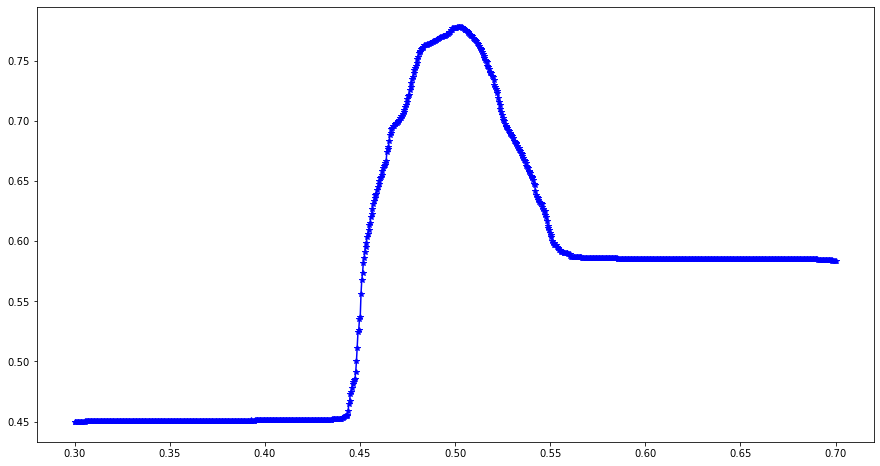

In [68]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b', marker='*')
plt.show()

In [70]:
max(acc), np.argmax(acc)

(0.7783302590424253, 504)

In [77]:
threshold[504]

0.5018018018018018

### Log Reg

In [66]:
scores = []
params = []

for n in [1]:
    
    model = LogisticRegression(penalty='l2', C=5.0, random_state = 42, n_jobs=-1)
    model.fit(X_train , y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

1 - 0.7655385355682092|

In [73]:
model = LogisticRegression(penalty='l2', C=5.0, random_state = 42, n_jobs=-1)
model.fit(X_train , y_train)

LogisticRegression(C=5.0, n_jobs=-1, random_state=42)

In [74]:
y_pred = model.predict_proba(X_test)

In [75]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

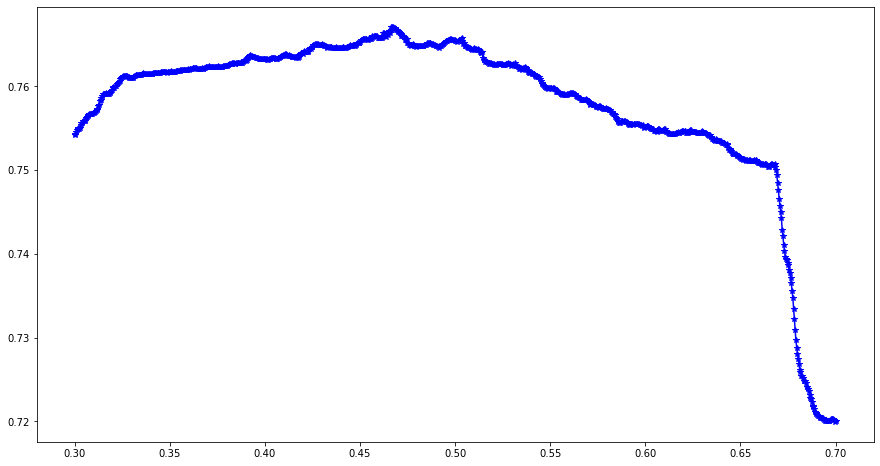

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b', marker='*')
plt.show()

In [78]:
max(acc), np.argmax(acc)

(0.7671425134333146, 417)

In [79]:
threshold[417]

0.46696696696696693

### RidgeClass

In [80]:
scores = []
params = []

for n in [1]:
    
    model = RidgeClassifier(alpha=7.25, fit_intercept=True, normalize=False, random_state=42)
    model.fit(X_train , y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

1 - 0.764776646082284|

In [81]:
model = RidgeClassifier(alpha=7.25, fit_intercept=True, normalize=False, random_state=42)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred)

0.764776646082284

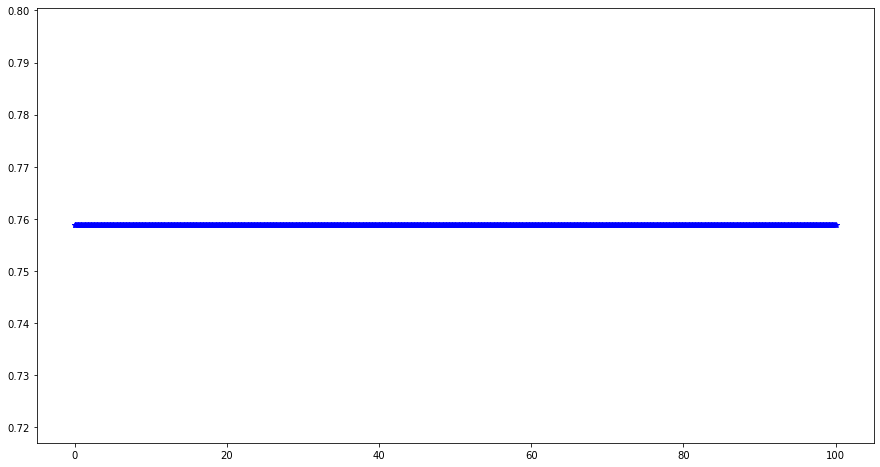

In [121]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.00001, 100.0, 1000), scores, color='b', marker='*')
plt.show()

### Bagging

In [80]:
%%time
scores = []
params = []

for n in range(1):
    
    model = BaggingClassifier(
                             base_estimator=DecisionTreeClassifier(criterion='entropy', 
                                                                   max_leaf_nodes=9,
#                                                                    max_depth=n,
                                                                   random_state=42),
                             n_estimators=450, 
#                              max_samples=n, 
                             max_features=0.525, 
                             bootstrap=True, 
                             bootstrap_features=True,
                             n_jobs=-1, 
                             random_state=42)
    
    
#     model.fit(X_train , y_train)
    score =  np.mean(cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=5))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

50 - 0.7611528822055137|100 - 0.767077694235589|150 - 0.7656942355889725|200 - 0.7672781954887219|250 - 0.7648822055137844|300 - 0.7649223057644111|350 - 0.7662055137844612|400 - 0.766937343358396|450 - 0.7672882205513785|500 - 0.766796992481203|550 - 0.7666967418546367|600 - 0.76668671679198|650 - 0.7668571428571429|700 - 0.7666365914786968|750 - 0.7667167919799499|800 - 0.7666666666666667|850 - 0.7668571428571428|900 - 0.76668671679198|950 - 0.7668170426065164|CPU times: user 35.4 s, sys: 2.61 s, total: 38 s
Wall time: 8min 37s


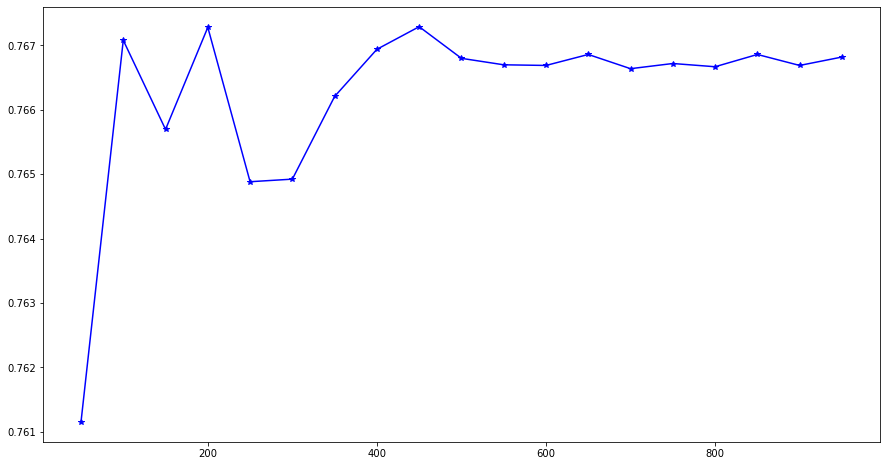

In [82]:
plt.figure(figsize=(15, 8))
plt.plot(range(50, 1000, 50), scores, color='b', marker='*')
plt.show()

In [83]:
max(scores), np.argmax(scores)

(0.7672882205513785, 8)

In [83]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=42),
                             n_estimators=450, max_features=0.525, bootstrap=True, bootstrap_features=True,
                             n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=9,
                                                        random_state=42),
                  bootstrap_features=True, max_features=0.525, n_estimators=450,
                  n_jobs=-1, random_state=42)

In [84]:
y_pred = model.predict_proba(X_test)

In [85]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

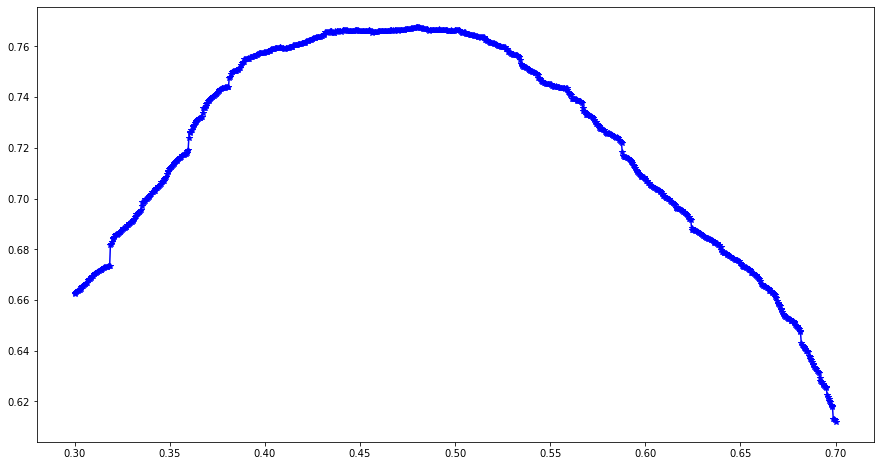

In [86]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b', marker='*')
plt.show()

In [87]:
max(acc), np.argmax(acc)

(0.7677841045793568, 450)

In [88]:
threshold[450]

0.48018018018018016

### GradientBoost

In [40]:
%%time
scores = []
params = []

for n in np.arange(1):
    model = GradientBoostingClassifier( 
                                       learning_rate=0.075, 
                                       n_estimators=300,
#                                        subsample=1.0, 
                                       criterion='friedman_mse', 
                                       min_samples_leaf=1, 
                                       max_depth=3, 
                                       random_state=42, 
                                       max_leaf_nodes=None, validation_fraction=0.1)
    
    score =  np.mean(cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=3))
#     model.fit(X_train , y_train)
#     score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

TypeError: fit() got an unexpected keyword argument 'eval_set'

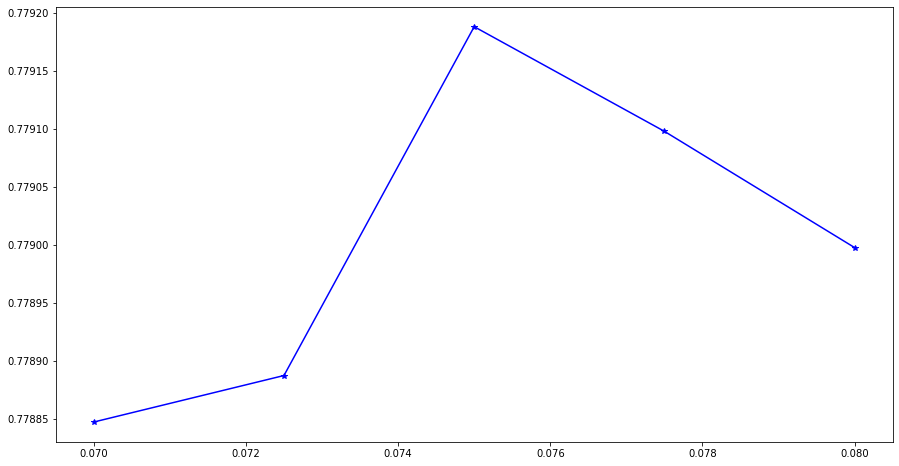

In [94]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.07, 0.08, 5), scores, color='b', marker='*')
plt.show()

In [95]:
max(scores), np.argmax(scores)

(0.779187969924812, 2)

In [89]:
model = GradientBoostingClassifier(learning_rate=0.075, n_estimators=300, criterion='friedman_mse', min_samples_leaf=1, 
                                       max_depth=3, random_state=42, max_leaf_nodes=None, validation_fraction=0.1)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.075, n_estimators=300,
                           random_state=42)

In [90]:
y_pred = model.predict_proba(X_test)

In [91]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

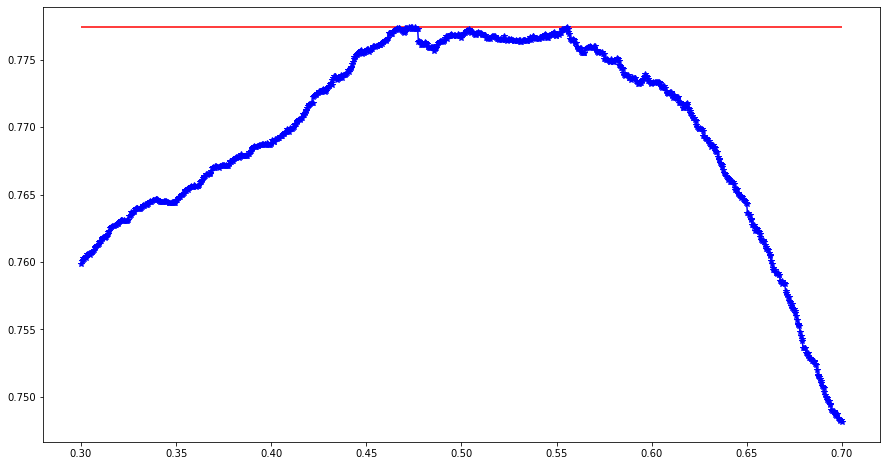

In [98]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b', marker='*')
plt.hlines(0.7774480712166172, 0.3, 0.7, colors='r')
plt.show()

In [93]:
max(acc), np.argmax(acc)

(0.7774480712166172, 431)

In [94]:
threshold[431]

0.47257257257257257

### XGBoost

In [32]:
%%time
scores = []
params = []

for n in np.arange(1, 2, 1):
    model = XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=300, seed=42)
    
#     score =  np.mean(cross_val_score(estimator=model, X=X, y=y, scoring='accuracy', cv=3))
   
    model.fit(X_train , y_train, eval_metric = 'logloss')
#     model.fit(X_train , y_train, eval_metric = 'accuracy')
#     model.fit(X_train , y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

1 - 0.7786911540620739|CPU times: user 48.3 s, sys: 47.3 ms, total: 48.3 s
Wall time: 6.23 s


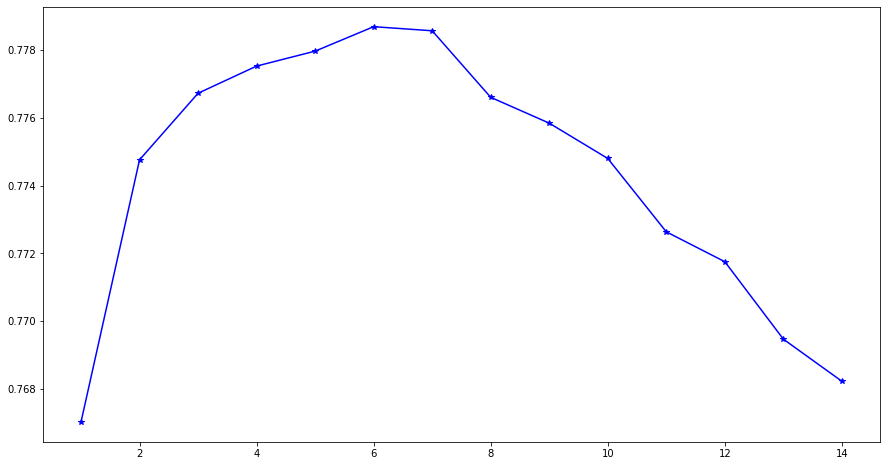

In [72]:
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 15, 1), scores, color='b', marker='*')
plt.show()

In [73]:
max(scores), np.argmax(scores)

(0.7786911540620739, 5)

In [106]:
model = XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=300, seed=42)
model.fit(X_train , y_train, eval_metric = 'logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [101]:
y_pred = model.predict_proba(X_test)

In [102]:
acc = []
threshold = []

for i in np.linspace(0.3, 0.7, 1000):
    
    acc.append(accuracy_score(y_test, y_pred[:, 1] > i))
    threshold.append(i)

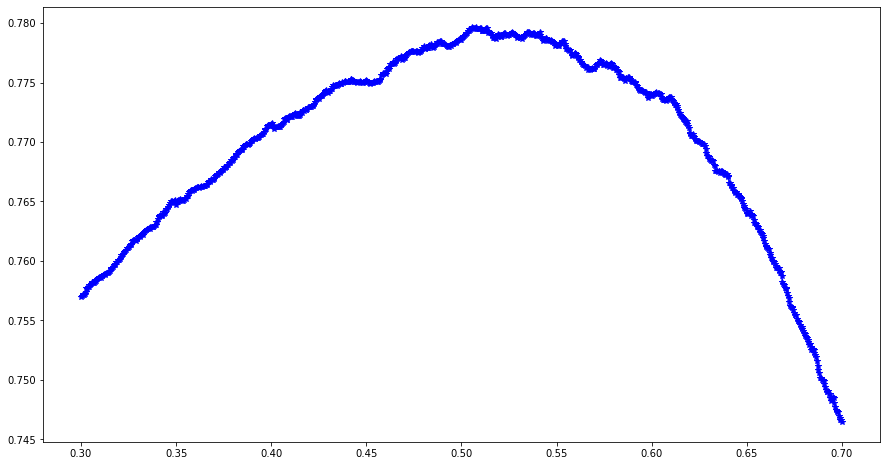

In [103]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.3, 0.7, 1000), acc, color='b', marker='*')
# plt.hlines(0.7774480712166172, 0.3, 0.7, colors='r')
plt.show()

In [104]:
max(acc), np.argmax(acc)

(0.7796936402277649, 514)

In [105]:
threshold[514]

0.5058058058058058

In [26]:
pred_train = pd.DataFrame()
pred_test = pd.DataFrame()

In [27]:
models = {'log_reg': [LogisticRegression(penalty='l2', C=5.0, random_state=42, n_jobs=-1), 
                      0.46696696696696693], 
          'RidgeClass': [RidgeClassifier(alpha=7.25, fit_intercept=True, normalize=False, random_state=42)],
          'AdaBoostClassifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=42), 
                                                   n_estimators=43, learning_rate=0.2789473684210526, random_state = 42), 
                                0.5018018018018018],
          'BaggingClassifier': [BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=42), 
                                                 n_estimators=450, max_features=0.525, bootstrap=True, bootstrap_features=True, 
                                                 n_jobs=-1, random_state=42), 
                                0.48018018018018016],
          
          'GradientBoostingClassifier': [GradientBoostingClassifier(learning_rate=0.075, n_estimators=300, criterion='friedman_mse', 
                                                                   min_samples_leaf=1, max_depth=3, random_state=42, 
                                                                   max_leaf_nodes=None, validation_fraction=0.1), 
                                         0.47257257257257257],
          
          'RandomForestClassifier': [RandomForestClassifier(n_estimators=4500, criterion='entropy', max_leaf_nodes=7, 
                                                           max_features=6, bootstrap=True, random_state=42, n_jobs=-1), 
                                     0.5042042042042042],
          'LGBMClassifier': [LGBMClassifier(n_estimators=100, learning_rate=0.14434343434, metric='accuracy', max_depth=9, random_state = 42), 
                             0.5004004004004005],
          'XGBClassifier': [XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=300, seed=42), 
                            0.5058058058058058]
          }

In [118]:
y_pred = np.array(model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
pred_train = pd.DataFrame()
pred_test = pd.DataFrame()

In [32]:
%%time
pred_train = pd.DataFrame()
pred_test = pd.DataFrame()

for name_model, m in models.items():
    
    preds = np.zeros(y.shape[0])
    kf = StratifiedKFold(n_splits=10 , random_state=42 , shuffle=True)
    scores = []
    print(name_model, time.strftime('%X'), end='-')
    
    for trn_idx , val_idx in kf.split(X , y):
        
        train_x = X.iloc[trn_idx]
        train_y = y.iloc[trn_idx]
        val_x = X.iloc[val_idx]
        val_y = y.iloc[val_idx]
                
        model = m[0]
        
        if name_model in ['LGBMClassifier', 'XGBClassifier']:
            if name_model in ['LGBMClassifier']:
                model.fit(train_x , train_y, eval_metric='accuracy')            
            else:
                model.fit(train_x , train_y, eval_metric = 'logloss')
                
        else:
            model.fit(train_x, train_y)
            
        if name_model in ['RidgeClass']:
            preds += model.predict(X) / kf.n_splits
            scores.append(accuracy_score(val_y, model.predict(val_x)))
        else:
            preds += model.predict_proba(X)[:, 1] / kf.n_splits
            scores.append(accuracy_score(val_y, np.array(model.predict_proba(val_x)[:, 1] > m[1])))      
          
    if name_model in ['RidgeClass']:
        pred_train[name_model] = preds    
    else:
        pred_train[name_model] = np.array(preds > m[1]).astype(int)    
    
    print(time.strftime('%X'), np.mean(scores))

log_reg 19:23:00-0.7673182957393484|0.7703258145363409|0.7692230576441103|0.7726315789473684|0.771328320802005|0.7697243107769424|0.7706265664160401|0.7707268170426065|0.7597994987468671|0.7700250626566416|19:23:33
RidgeClass 19:23:33-0.7631077694235588|0.7654135338345864|0.7650125313283208|0.766516290726817|0.7671177944862155|0.7656140350877193|0.7662155388471178|0.769624060150376|0.7560902255639098|0.770827067669173|19:23:35
AdaBoostClassifier 19:23:35-0.7774436090225564|0.7808521303258146|0.7775438596491228|0.7801503759398496|0.7782456140350877|0.7792481203007519|0.778546365914787|0.7776441102756892|0.7682205513784461|0.7832581453634085|19:24:41
BaggingClassifier 19:24:41-0.7680200501253133|0.774937343358396|0.7714285714285715|0.7666165413533834|0.7704260651629072|0.7674185463659148|0.77203007518797|0.7674185463659148|0.7592982456140351|0.7718295739348371|19:25:46
GradientBoostingClassifier 19:25:46-0.7783458646616541|0.7792481203007519|0.7792481203007519|0.7812531328320802|0.779849

In [33]:
pred_train.head(3)

log_reg  RidgeClass  AdaBoostClassifier  BaggingClassifier  \
0        0         0.0                   1                  1   
1        0         0.0                   0                  0   
2        0         0.0                   0                  0   

   GradientBoostingClassifier  RandomForestClassifier  LGBMClassifier  \
0                           1                       0               1   
1                           0                       0               0   
2                           0                       0               0   

   XGBClassifier  
0              1  
1              0  
2              0

In [36]:
models_2 = {'log_reg': LogisticRegression(random_state=42, n_jobs=-1),  
          'RidgeClass': RidgeClassifier(random_state=42),
          'AdaBoostClassifier': AdaBoostClassifier(random_state = 42), 
          'BaggingClassifier': BaggingClassifier(n_jobs=-1, random_state=42), 
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
          'RandomForestClassifier': RandomForestClassifier(n_estimators=4500, random_state=42, n_jobs=-1), 
          'LGBMClassifier': LGBMClassifier(metric='accuracy', random_state = 42), 
          'XGBClassifier': XGBClassifier(seed=42), 
          }

In [41]:
pred_train_2 = pd.DataFrame()
pred_test = pd.DataFrame()

for name_model, m in models_2.items():
    print(name_model, time.strftime('%X'), end='-')
    
    model = m
    preds = np.zeros(y.shape[0])
    kf = StratifiedKFold(n_splits=10 , random_state=42 , shuffle=True)
    scores = []
        
    for trn_idx , val_idx in kf.split(pred_train, y):
        
        train_x = pred_train.iloc[trn_idx]
        train_y = y.iloc[trn_idx]
        val_x = pred_train.iloc[val_idx]
        val_y = y.iloc[val_idx]
        
        model = m
        
        if name_model in ['LGBMClassifier', 'XGBClassifier']:
            if name_model in ['LGBMClassifier']:
                model.fit(train_x , train_y, eval_metric='accuracy')            
            else:
                model.fit(train_x , train_y, eval_metric = 'logloss')
                
        else:
            model.fit(train_x, train_y)
            
        if name_model in ['RidgeClass']:
            preds += model.predict(pred_train) / kf.n_splits
            scores.append(accuracy_score(val_y, model.predict(val_x)))
        else:
            preds += model.predict(pred_train) / kf.n_splits
            scores.append(accuracy_score(val_y, np.array(model.predict(val_x))))      
          
    if name_model in ['RidgeClass']:
        pred_train_2[name_model] = preds    
    else:
        pred_train_2[name_model] = preds
    
    print(time.strftime('%X'), np.mean(scores))

log_reg 20:11:10-20:11:19 0.7880501253132832
RidgeClass 20:11:19-20:11:20 0.7886716791979949
AdaBoostClassifier 20:11:20-20:11:42 0.7886817042606517
BaggingClassifier 20:11:42-20:11:46 0.7897644110275689
GradientBoostingClassifier 20:11:46-20:12:13 0.7899649122807018
RandomForestClassifier 20:12:13-20:20:40 0.7896541353383458
LGBMClassifier 20:20:40-20:20:44 0.7902255639097744
XGBClassifier 20:20:44-20:20:56 0.7897443609022556


In [42]:
pred_train_2.head(3)

log_reg  RidgeClass  AdaBoostClassifier  BaggingClassifier  \
0      1.0         1.0                 1.0                1.0   
1      0.0         0.0                 0.0                0.0   
2      0.0         0.0                 0.0                0.0   

   GradientBoostingClassifier  RandomForestClassifier  LGBMClassifier  \
0                         1.0                     1.0             1.0   
1                         0.0                     0.0             0.0   
2                         0.0                     0.0             0.0   

   XGBClassifier  
0            1.0  
1            0.0  
2            0.0

In [43]:
for name_model, m in models_2.items():
    print(name_model, time.strftime('%X'), end='-')
    
    model = m
    preds = np.zeros(y.shape[0])
    kf = StratifiedKFold(n_splits=10 , random_state=42 , shuffle=True)
    scores = []
        
    for trn_idx , val_idx in kf.split(pred_train_2, y):
        
        train_x = pred_train_2.iloc[trn_idx]
        train_y = y.iloc[trn_idx]
        val_x = pred_train_2.iloc[val_idx]
        val_y = y.iloc[val_idx]
        
        model = m
        
        if name_model in ['LGBMClassifier', 'XGBClassifier']:
            if name_model in ['LGBMClassifier']:
                model.fit(train_x , train_y, eval_metric='accuracy')            
            else:
                model.fit(train_x , train_y, eval_metric = 'logloss')
                
        else:
            model.fit(train_x, train_y)
            
        if name_model in ['RidgeClass']:
#             preds += model.predict(pred_train) / kf.n_splits
            scores.append(accuracy_score(val_y, model.predict(val_x)))
        else:
#             preds += model.predict(pred_train) / kf.n_splits
            scores.append(accuracy_score(val_y, np.array(model.predict(val_x))))      
          
#     if name_model in ['RidgeClass']:
#         pred_train_2[name_model] = preds    
#     else:
#         pred_train_2[name_model] = preds
    
    print(time.strftime('%X'), np.mean(scores))

log_reg 20:20:56-20:21:08 0.7911478696741855
RidgeClass 20:21:08-20:21:09 0.7910476190476191
AdaBoostClassifier 20:21:09-20:21:24 0.7909072681704261
BaggingClassifier 20:21:24-20:21:27 0.7899047619047618
GradientBoostingClassifier 20:21:27-20:21:50 0.7902055137844611
RandomForestClassifier 20:21:50-20:28:41 0.7898646616541354
LGBMClassifier 20:28:41-20:28:43 0.7900350877192982
XGBClassifier 20:28:43-20:28:54 0.7899147869674186


In [ ]:
models_3 = {'log_reg': LogisticRegression(random_state=42, n_jobs=-1),  
          'RidgeClass': RidgeClassifier(random_state=42),
          'AdaBoostClassifier': AdaBoostClassifier(random_state = 42), 
          'BaggingClassifier': BaggingClassifier(n_jobs=-1, random_state=42), 
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
          'RandomForestClassifier': RandomForestClassifier(n_estimators=4500, random_state=42, n_jobs=-1), 
          'LGBMClassifier': LGBMClassifier(metric='accuracy', random_state = 42), 
          'XGBClassifier': XGBClassifier(seed=42), 
          }

In [185]:
pred_test[[col for col in pred_train.columns if col.startswith('submit_')]]

submit_log_reg  submit_RidgeClass  submit_AdaBoostClassifier  \
0                   0                  0                          0   
1                   0                  0                          0   
2                   0                  0                          0   
3                   0                  0                          0   
4                   0                  0                          0   
...               ...                ...                        ...   
24933               1                  1                          1   
24934               1                  1                          1   
24935               1                  1                          1   
24936               1                  1                          1   
24937               1                  1                          1   

       submit_BaggingClassifier  submit_GradientBoostingClassifier  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
24933                         1                                  1   
24934                         1                                  1   
24935                         1                                  1   
24936                         1                                  1   
24937                         1                                  1   

       submit_RandomForestClassifier  submit_LGBMClassifier  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   
...                              ...                    ...   
24933                              1                      1   
24934                              1                      1   
24935                              1                      1   
24936                              1                      1   
24937                              1                      1   

       submit_XGBClassifier  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
24933                     1  
24934                     1  
24935                     1  
24936                     1  
24937                     1  

[24938 rows x 8 columns]

In [229]:
pred_test[[col for col in pred_train.columns if col.startswith('submit_')]].sum(axis = 1).value_counts()

0    12834
8     8812
1      726
6      713
7      641
4      384
2      302
5      289
3      237
dtype: int64

In [230]:
pred_test.submit_log_reg.sum()

10020

In [195]:
(pred_test[[col for col in pred_test.columns if col.startswith('submit_')]].sum(axis=1) >= 3).astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
24933    1
24934    1
24935    1
24936    1
24937    1
Length: 24938, dtype: int64

In [231]:
scores = []
for i in range(1, 8):
    
    y_pred = (pred_test[[col for col in pred_test.columns if col.startswith('submit_')]].sum(axis=1) >= i).astype(int)
    
    scores.append(accuracy_score(y_test, y_pred))
    print(i, accuracy_score(y_test, y_pred))

1 0.7712326569893335
2 0.771954447028631
3 0.7732376293207154
4 0.7749619055257038
5 0.775042104418959
6 0.7741198171465233
7 0.7704707675034085


In [176]:
pred_test[TARGET] = (pred_test[[col for col in pred_test.columns if col.startswith('submit_')]].sum(axis=1) >= 2).astype(int)
pred_test.drop([col for col in pred_test.columns if col.startswith('submit_')], axis=1, inplace=True)

In [177]:
pred_test

Survived
0             0
1             0
2             0
3             0
4             0
...         ...
24933         1
24934         1
24935         1
24936         1
24937         1

[24938 rows x 1 columns]

In [167]:
scores = []
params = []

for n in np.linspace(0.0001, 0.5, 30):
    
    model = LGBMClassifier(
                            n_estimators=10, 
                            learning_rate=n, 
                            metric='accuracy', 
                            max_depth=1, 
                            random_state = 42)
    model.fit(pred_train, y_train, eval_metric='accuracy')
    
    score = accuracy_score(y_test, model.predict(pred_test))
    scores.append(score)
    params.append(n)
    print(n, '-', score, end='|')

0.0001 - 0.571056219424172|0.017337931034482758 - 0.571056219424172|0.03457586206896552 - 0.779011949635095|0.051813793103448275 - 0.7786911540620739|0.06905172413793104 - 0.7786911540620739|0.0862896551724138 - 0.7786911540620739|0.10352758620689655 - 0.7786911540620739|0.12076551724137931 - 0.7786911540620739|0.13800344827586206 - 0.7792926457614885|0.15524137931034482 - 0.7786911540620739|0.17247931034482758 - 0.7786911540620739|0.18971724137931034 - 0.7788916512952121|0.20695517241379308 - 0.7792926457614885|0.22419310344827584 - 0.7788916512952121|0.2414310344827586 - 0.7788916512952121|0.2586689655172414 - 0.7788916512952121|0.2759068965517241 - 0.7788916512952121|0.29314482758620686 - 0.7788916512952121|0.31038275862068965 - 0.7788916512952121|0.3276206896551724 - 0.7788916512952121|0.34485862068965517 - 0.7788916512952121|0.3620965517241379 - 0.7788916512952121|0.3793344827586207 - 0.7788916512952121|0.39657241379310343 - 0.7788916512952121|0.41381034482758616 - 0.7788916512952

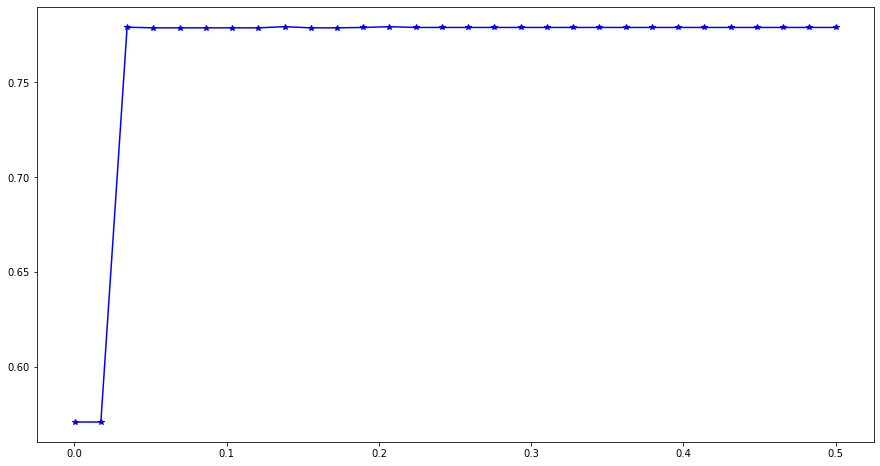

In [168]:
plt.figure(figsize=(15, 8))
plt.plot(np.linspace(0.0001, 0.5, 30), scores, color='b', marker='*')
plt.show()

In [169]:
max(scores), np.argmax(scores)

(0.7792926457614885, 8)

### -----------------------------------------------------